In [1]:
#input : training set X, gaussian K개
#output : (uj,Ej), 1 <= j <=K,  p
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


In [2]:
def gauss_function(x, amp, x0, sigma):
    return amp * np.exp(-(x - x0) ** 2. / (2. * sigma ** 2.))


In [3]:
#Generate sample from three gaussian distrbutions
#평균 표준편차 난수개수
samples = np.random.normal(-0.5, 0.2, 2000)
samples = np.append(samples, np.random.normal(-0.1, 0.07, 5000))
samples = np.append(samples, np.random.normal(0.2, 0.13, 10000))
print(samples)

[-0.46868096 -0.41239099 -0.57422585 ...  0.42257564  0.28801007
  0.22381496]


In [4]:
gmm= GaussianMixture(n_components=3, covariance_type="full", tol=0.001)
gmm= gmm.fit(X=np.expand_dims(samples, 1))

In [5]:
gmm_x= np.linspace(-2, 1.5, 5000)
gmm_y= np.exp(gmm.score_samples(gmm_x.reshape(-1, 1)))

In [6]:
gmm_y_sum= np.full_like(gmm_x, fill_value=0, dtype=np.float32)
for m, c, w in zip(gmm.means_.ravel(), gmm.covariances_.ravel(), gmm.weights_.ravel()):
    gauss = gauss_function(x=gmm_x, amp=1, x0=m, sigma=np.sqrt(c))
    gmm_y_sum += gauss / np.trapz(gauss, gmm_x) * w

/home/pmp/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


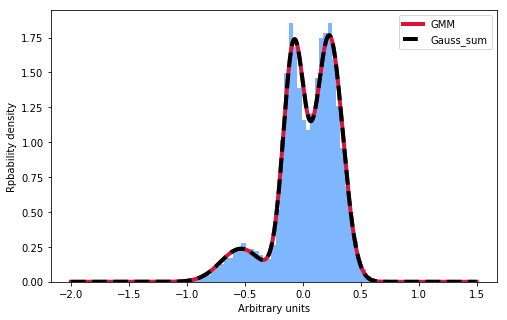

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[8, 5])
ax.hist(samples, bins=50, normed=True, alpha=0.5, color="#0070FF")
ax.plot(gmm_x, gmm_y, color = "crimson", lw=4, label="GMM")
ax.plot(gmm_x, gmm_y_sum, color="black", lw=4, label="Gauss_sum", linestyle="dashed")

ax.set_ylabel("Rpbability density")
ax.set_xlabel("Arbitrary units")
plt.legend()
plt.show()